In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
# 3.1 Dataset Overview
print("Dataset Overview:")
print(df.head())
print("\nDataset Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
                                     id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0 

In [4]:
# 3.4 Data Cleaning and Preprocessing
# Remove null values
df = df.dropna()

In [5]:
# Rename columns
df = df.rename(columns={"cab_type": "cab_company", "name": "cab_type"})

In [6]:
# Filter by company
df_lyft = df[df['cab_company'] == "Lyft"]
df_uber = df[df['cab_company'] == "Uber"]

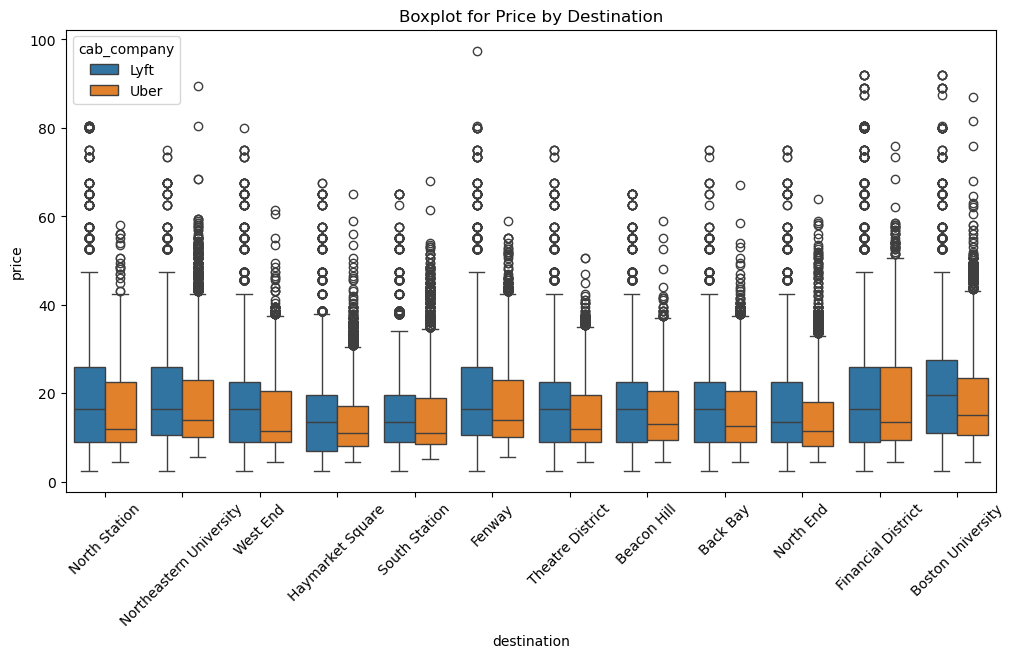

In [7]:
# 3.5 Data Visualization
# Boxplot for Price and Destination
plt.figure(figsize=(12, 6))
sns.boxplot(x="destination", y="price", hue="cab_company", data=df)
plt.title("Boxplot for Price by Destination")
plt.xticks(rotation=45)
plt.show()

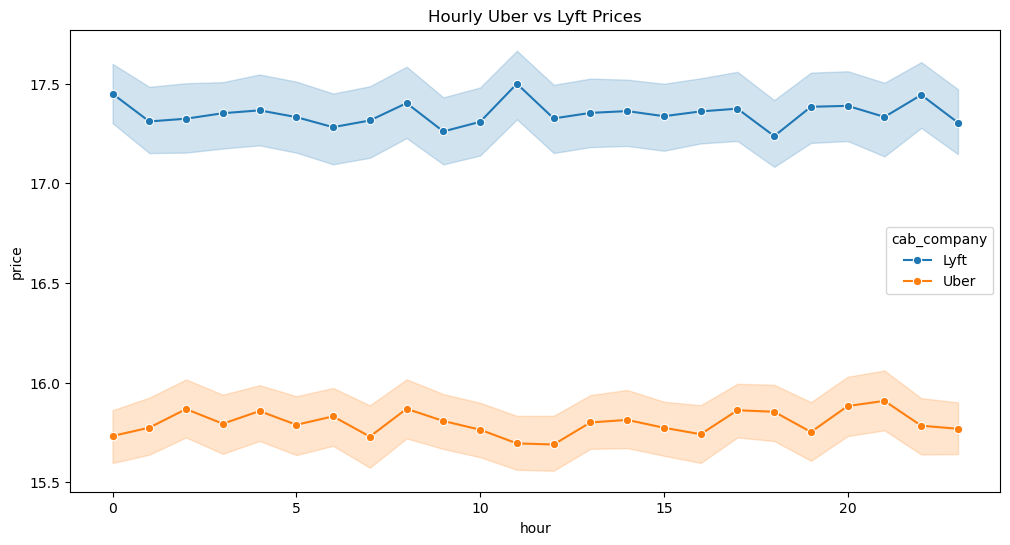

In [8]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="price", hue="cab_company", data=df, marker="o")
plt.title("Hourly Uber vs Lyft Prices")
plt.show()

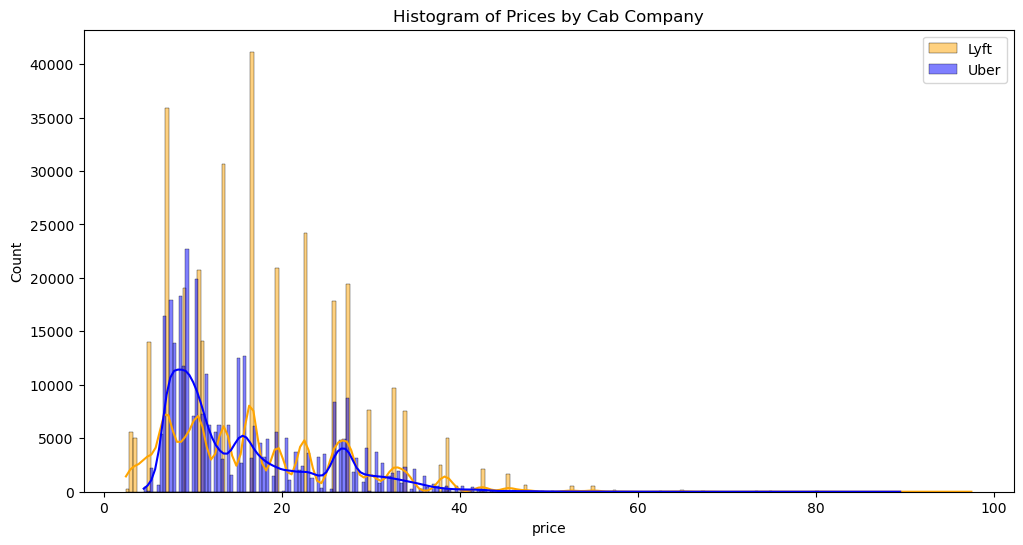

In [9]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df[df['cab_company'] == "Lyft"]['price'], kde=True, color="orange", label="Lyft")
sns.histplot(df[df['cab_company'] == "Uber"]['price'], kde=True, color="blue", label="Uber")
plt.title("Histogram of Prices by Cab Company")
plt.legend()
plt.show()

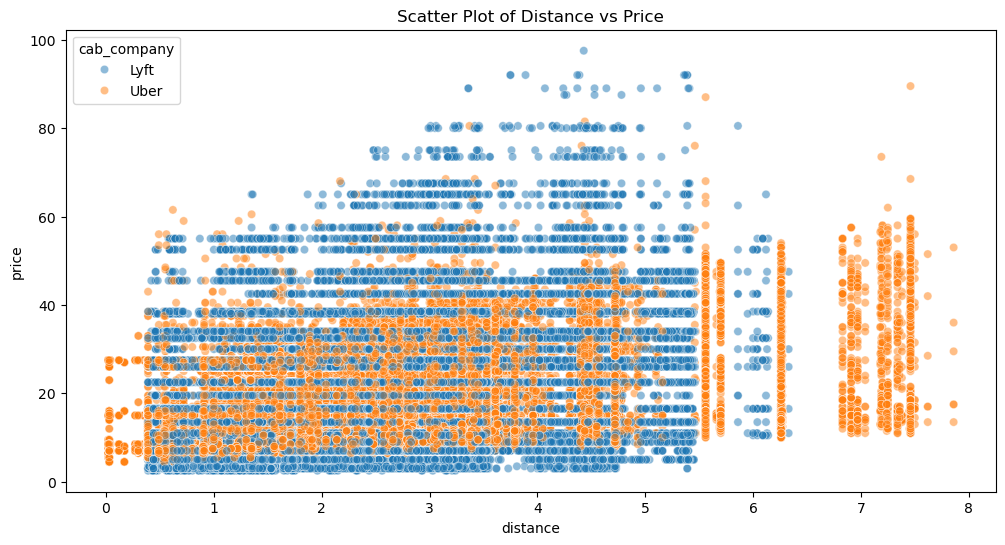

In [10]:
# Scatter Plot for Distance and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x="distance", y="price", hue="cab_company", data=df, alpha=0.5)
plt.title("Scatter Plot of Distance vs Price")
plt.show()

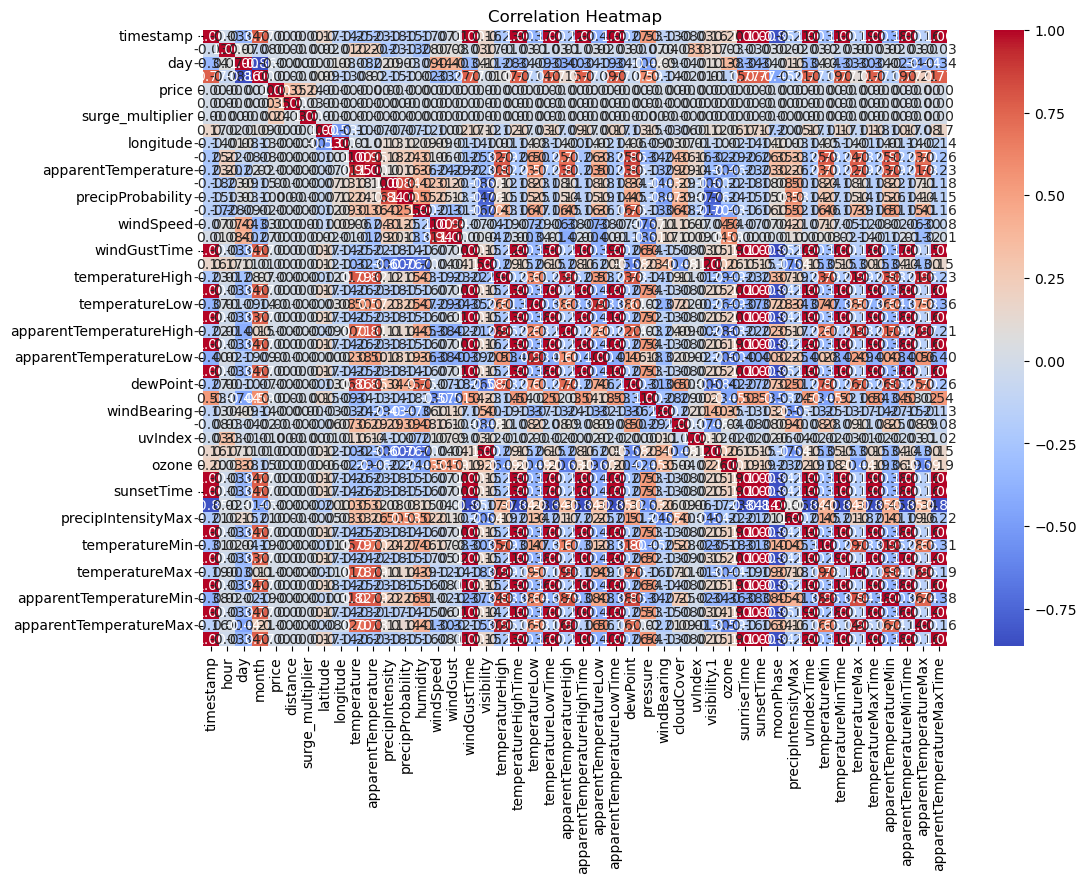

In [11]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

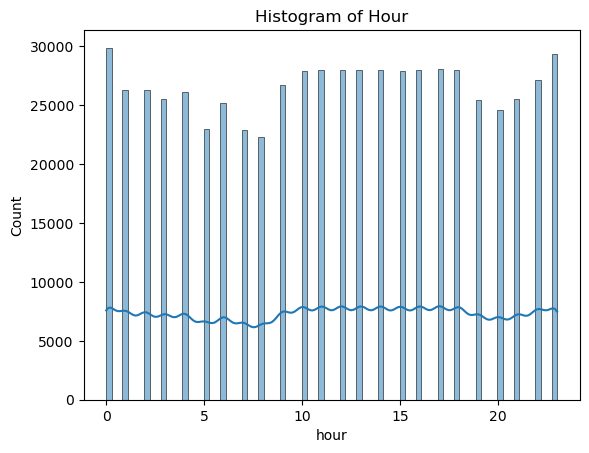

In [12]:
# 3.6 Test Normality
# Histograms and Q-Q plots for `hour`
sns.histplot(df['hour'], kde=True)
plt.title("Histogram of Hour")
plt.show()

In [13]:
# 3.7 Hypothesis Testing
# Chi-squared test (cross-tabulation)
from scipy.stats import chi2_contingency
chi2_table = pd.crosstab(df['cab_company'], df['cab_type'])
chi2, p, dof, expected = chi2_contingency(chi2_table)
print("Chi-Squared Test Results")
print(f"Chi2 Value: {chi2}, P-Value: {p}, Degrees of Freedom: {dof}")

Chi-Squared Test Results
Chi2 Value: 637976.0, P-Value: 0.0, Degrees of Freedom: 11


In [14]:

# T-test
from scipy.stats import ttest_ind
lyft_prices = df[df['cab_company'] == "Lyft"]['price']
uber_prices = df[df['cab_company'] == "Uber"]['price']
t_stat, p_value = ttest_ind(lyft_prices, uber_prices)
print("\nT-Test Results")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Test Results
T-Statistic: 66.83531585586235, P-Value: 0.0


In [15]:
# 4. Modeling
# Splitting Data
X = df[['hour', 'distance', 'cab_type', 'cab_company']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Encoding categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [17]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print("\nLinear Model Evaluation")
print(f"R2 Score: {r2_score(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}")


Linear Model Evaluation
R2 Score: 0.8928812065972889, MSE: 9.34479501014709


In [18]:
# PCA for Principal Component Regression
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
linear_model.fit(X_train_pca, y_train)
y_pred_pca = linear_model.predict(X_test_pca)
print("\nPCR Model Evaluation")
print(f"R2 Score: {r2_score(y_test, y_pred_pca)}, MSE: {mean_squared_error(y_test, y_pred_pca)}")


PCR Model Evaluation
R2 Score: 0.4197360145084884, MSE: 50.62088382384545


In [19]:
# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("\nDecision Tree Evaluation")
print(f"R2 Score: {r2_score(y_test, y_pred_tree)}, MSE: {mean_squared_error(y_test, y_pred_tree)}")


Decision Tree Evaluation
R2 Score: 0.9000511708682163, MSE: 8.71930396218501
